
#### MBD 2022-2023
# Fundamentals of NLP Group Project

# Advanced Sentimental Analysis
##### JOSEPHINE SCHNEEGANS, YASHWANTH THONUKURU, ASHVAL VAIDYA , SHASHANK GOLLAPALLI

**Import Libraries**

**Please install the following library if these are not installed in your environment**

In [70]:
import locale
#locale.getpreferredencoding = lambda: "UTF-8"

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
# If you do not have the following the packages, please do install them in your environment
!pip install spacytextblob -q
!pip install transformers -q
!pip install pyLDAvis -q
!pip install NRCLex -q
!pip install spacy-transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 93.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 68.9 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#importing libraries

#preprocessing data
import pandas as pd
import numpy as np
import datetime as dt
import math 
import string
from pandas import DataFrame
from numpy import array
from matplotlib import pyplot
from collections import Counter

# visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as snsb

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Nautural Language processing libraries
import re
import spacy 
from spacytextblob.spacytextblob import SpacyTextBlob
from wordcloud import *
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Topic modelling
import gensim
from gensim import corpora, models
from pprint import pprint
from gensim.models import CoherenceModel

#sentiment analsyis libraries 
#RoBERTa model from HuggingFace
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

import sys

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_colwidth = None

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# 1. Data Exploration

### 1. Import and clean Data

In [5]:
# Reading in data
data = pd.read_table('/content/drive/MyDrive/Colab Notebooks/drugsComTrain_raw.tsv', delimiter='\t', encoding='utf-8') 

In [6]:
# Inspecting data dataframe
data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.""",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch""",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I&#039;m actually sleeping better. Slight constipation is about it for me. It truly is amazing. The cost pales in comparison to what I spent on oxycontin.""",9.0,"November 27, 2016",37


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [8]:
# Check shape
data.shape

(161297, 7)

In [9]:
# Check columns
data.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [10]:
# Renaming column names to avoid ambiguity
data = data.rename(columns={'Unnamed: 0': 'ID', 'review': 'patientreview', 'date': 'reviewdate', 'usefulCount': 'Useful'})

In [11]:
# Changing 'reviewdate' column's data type from 'Object' to 'datetime' 
data['reviewdate'] = pd.to_datetime(data['reviewdate'])

In [12]:
# Check number of missing values
data.isna().sum()

ID                 0
drugName           0
condition        899
patientreview      0
rating             0
reviewdate         0
Useful             0
dtype: int64

In [13]:
# Dropping the missing values
data = data.dropna()

In [14]:
#There are a few rows where the rating and condition are intermixed. dropping such rows
condition_errorTR = data[data['condition'].str.contains('users found this')]
data = data.drop(condition_errorTR.index)

In [15]:
# Check the shape of data post dropping
data.shape

(159498, 7)

In [16]:
# Check unique values in data
data.condition.nunique()

811

In [17]:
# Check drugName in data
data.drugName.nunique()

3412

In [18]:
# Check for duplicated values in data
data.duplicated().sum()

0

### 2. Subset Data

In [19]:
# Select only the rows with unique drugs having at least three reviews for each condition
data_sub = data.groupby('condition').filter(lambda x: x.groupby('drugName')['patientreview'].transform('count').ge(3).all() and x['drugName'].nunique() >= 2)

In [20]:
# Shape of data
data_sub.shape

(1712, 7)

In [21]:
# Check unique values in data_sub
data_sub.condition.nunique()

44

In [22]:
# Check drugName in data_sub
data_sub.drugName.nunique()

105

In [23]:
# Check for missing values
data_sub.isna().sum()

ID               0
drugName         0
condition        0
patientreview    0
rating           0
reviewdate       0
Useful           0
dtype: int64

In [24]:
# Check for duplicated values in data_sub
data_sub.duplicated().sum()

0

### 3. Exploratory Data Analysis

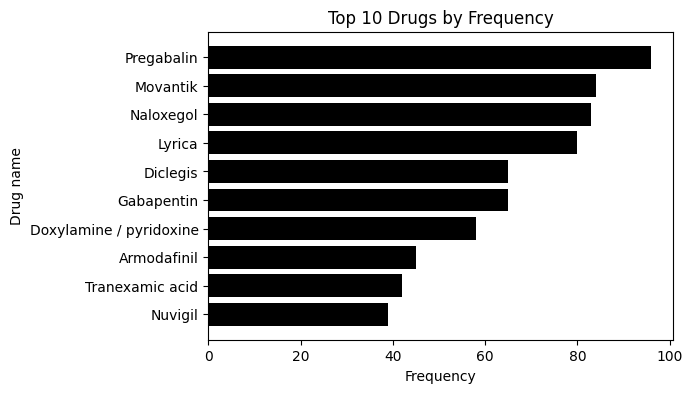

In [25]:
# Drugs frequency
drugs = data_sub['drugName'].value_counts().sort_values(ascending = False).head(10)

plt.figure(figsize=(6,4))
plt.barh(drugs.index, drugs.values, color='black')
plt.title('Top 10 Drugs by Frequency')
plt.xlabel("Frequency")
plt.ylabel("Drug name")
plt.gca().invert_yaxis()
plt.show()

In [26]:
#Average rating per drug
avg_rating = data_sub.groupby('drugName')['rating'].mean().reset_index()
avg_rating = avg_rating[avg_rating['drugName'].isin(drugs.index)].sort_values('rating', ascending=False).reset_index(drop=True)
avg_rating

,drugName,rating
0,Tranexamic acid,8.380952
1,Armodafinil,8.044444
2,Nuvigil,7.897436
3,Diclegis,6.892308
4,Gabapentin,6.738462
5,Doxylamine / pyridoxine,6.706897
6,Pregabalin,6.520833
7,Lyrica,6.212500
8,Naloxegol,4.819277
9,Movantik,4.250000


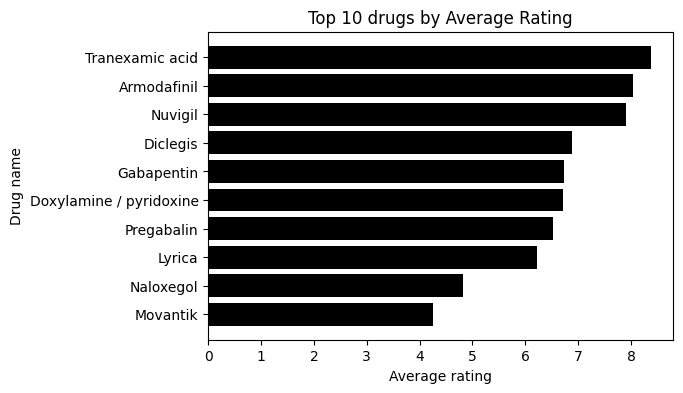

In [27]:
#Plot for average rating per drug
plt.figure(figsize=(6,4))
plt.barh(avg_rating['drugName'], avg_rating['rating'], color = 'black')
plt.title('Top 10 drugs by Average Rating')
plt.xlabel('Average rating')
plt.ylabel('Drug name')
plt.gca().invert_yaxis()
plt.show()

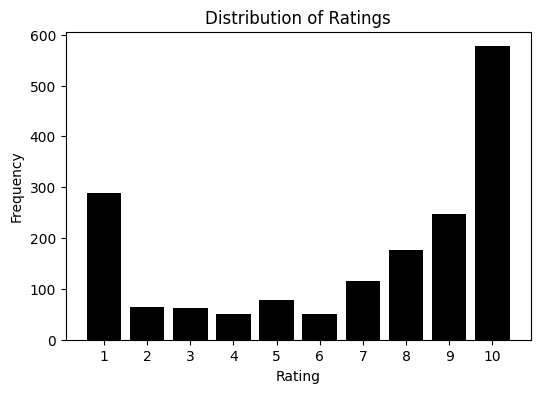

In [28]:
#Rating distribution
rating = data_sub['rating'].value_counts().sort_index().head(10)

plt.figure(figsize=(6,4))
plt.bar(rating.index, rating.values, color = 'black')
plt.title('Distribution of Ratings')
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.xticks(rating.index)
plt.show()

In [29]:
#Top 10 conditions
condition = effectiveness = data_sub.groupby('condition')['rating'].count()
condition = condition.sort_values(ascending = False).head(10)

In [30]:
#Average rating per condition (Effectiveness)
effectiveness = data_sub.groupby('condition')['rating'].mean().reset_index()
effectiveness = effectiveness[effectiveness['condition'].isin(condition.index)].sort_values('rating', ascending=False).reset_index(drop=True)
effectiveness

,condition,rating
0,Menorrhagia,8.362500
1,Obstructive Sleep Apnea/Hypopnea Syndrome,8.337500
2,Hirsutism,8.148649
3,Shift Work Sleep Disorde,7.983333
4,Chronic Idiopathic Constipation,7.800000
5,Binge Eating Disorde,7.597222
6,Nausea/Vomiting of Pregnancy,6.804878
7,Neuropathic Pain,6.415020
8,Keratoconjunctivitis Sicca,5.425926
9,"Constipation, Drug Induced",5.083333


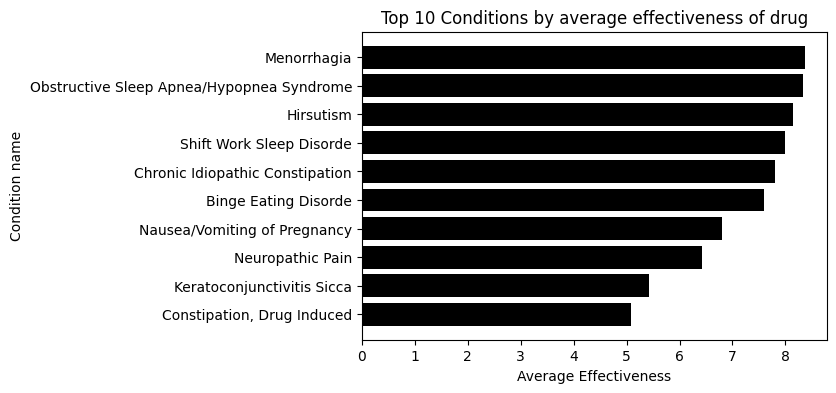

In [31]:
# Plot for Effectiveness of drug for condition
plt.figure(figsize=(6,4))
plt.barh(effectiveness['condition'], effectiveness['rating'], color = 'black')
plt.title('Top 10 Conditions by average effectiveness of drug')
plt.xlabel('Average Effectiveness')
plt.ylabel('Condition name')
plt.gca().invert_yaxis()
plt.show()

# Manual Sentiment based on Rating

In [32]:
# Assigning sentiment score based on the rating given by the customers assuming that higher rating would mean positive reviews
# 1 is positive, 0 is neutral, -1 is negative

# Training dataset
data_sub.loc[(data_sub['rating'] >= 7), 'Manual_Sentiment'] = 1
data_sub.loc[(data_sub['rating'] < 7), 'Manual_Sentiment'] = 0
data_sub.loc[(data_sub['rating'] < 4), 'Manual_Sentiment'] = -1

In [33]:
#Checking Manual Sentiment distribution in data_sub
data_sub['Manual_Sentiment'].value_counts()

 1.0    1116
-1.0     417
 0.0     179
Name: Manual_Sentiment, dtype: int64

In [34]:
data_sub.head(2)

,ID,drugName,condition,patientreview,rating,reviewdate,Useful,Manual_Sentiment
26,206180,Eflornithine,Hirsutism,"""I&#039;m writing a second review on Vaniqa. I started using this in February this year. Twice a day although some days/times I do forget. I just want to say how delighted I am to have found this. It has totally and completely changed my life! I had terrible male pattern hair growth all over my cheeks, chin, upper and lower lip and starting to grow down my neck. I used to pluck for up to 2 hrs a time every 3rd day but was never hair free. I wouldn&#039;t kiss anyone hello or goodbye as even plucked the stubble could be felt under my skin. 3 months on im not scared of being caught in bright sunlight I pluck around once a fortnight and it takes around 10 mins. The hairs that are coming through are soft and downy. My life is transformed.""",10.0,2014-05-11,99,1.0
73,172031,Amitiza,"Constipation, Drug Induced","""I had a tummy tuck on Dec 18. The surgery was painful but the constipation from opioids from the surgery was just as bad. My plastic surgeon wasn&#039;t familiar with treating OIC so I called my primary care physician. She gave me Amitiza 24mcg. It took almost two days but it was amazing and I was so thankful. I had to remain on opioids for three weeks and the Amitiza worked so well I haven&#039;t had any issues!! Thank you Amitiza!!!""",10.0,2016-01-12,35,1.0


# Preprocess

In [35]:
#Load spacy
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

# Define function to clean text data, this fucntion removes HTML tags, special characters, and digits from the text data, converts it to lowercase, 
# and removes extra whitespaces.

def clean_text(text):
    clean = re.compile('<.*?>')
    text = re.sub(clean, '', text)
    text = re.sub('[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = re.sub('\s+', ' ', text).strip()
    return text

#Preprocessing the text: filters out stopwords, punctuation, and whitespace, tokenizes and lemmatises
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

In [36]:
#Apply text cleaning to 'patientreview' column of train data
data_sub['review_cleaned'] = data_sub['patientreview'].apply(clean_text)

#Apply text cleaning to 'review_cleaned' column of train data
data_sub['review_cleaned'] = data_sub['review_cleaned'].apply(preprocess_text)

In [37]:
# Calculate number of charcters in each review in data_sub
data_sub['reviewchars'] = data_sub['patientreview'].apply(len)

# Calculate number of charcters in each clean review in data_sub
data_sub['reviewchars_clean'] = data_sub['review_cleaned'].apply(len)

In [38]:
# Calculate number of words in each review in data_sub
data_sub['reviewwords'] = data_sub['patientreview'].apply(lambda x:len(nltk.word_tokenize(x)))

# Calculate number of words in each clean review in data_sub
data_sub['reviewwords_clean'] = data_sub['review_cleaned'].apply(lambda x:len(nltk.word_tokenize(x)))

In [39]:
# Calculate number of sentences in each review in data_sub
data_sub['reviewsentence'] = data_sub['patientreview'].apply(lambda x:len(nltk.sent_tokenize(x)))

# Calculate number of sentences in each review in data_sub
data_sub['reviewsentence_clean'] = data_sub['review_cleaned'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [40]:
data_sub.head(2)

,ID,drugName,condition,patientreview,rating,reviewdate,Useful,Manual_Sentiment,review_cleaned,reviewchars,reviewchars_clean,reviewwords,reviewwords_clean,reviewsentence,reviewsentence_clean
26,206180,Eflornithine,Hirsutism,"""I&#039;m writing a second review on Vaniqa. I started using this in February this year. Twice a day although some days/times I do forget. I just want to say how delighted I am to have found this. It has totally and completely changed my life! I had terrible male pattern hair growth all over my cheeks, chin, upper and lower lip and starting to grow down my neck. I used to pluck for up to 2 hrs a time every 3rd day but was never hair free. I wouldn&#039;t kiss anyone hello or goodbye as even plucked the stubble could be felt under my skin. 3 months on im not scared of being caught in bright sunlight I pluck around once a fortnight and it takes around 10 mins. The hairs that are coming through are soft and downy. My life is transformed.""",10.0,2014-05-11,99,1.0,m write second review vaniqa start february year twice day daystime forget want delighted find totally completely change life terrible male pattern hair growth cheek chin upper low lip start grow neck pluck hrs time rd day hair free not kiss hello goodbye pluck stubble feel skin month m scared catch bright sunlight pluck fortnight take min hair come soft downy life transform,746,377,168,63,11,1
73,172031,Amitiza,"Constipation, Drug Induced","""I had a tummy tuck on Dec 18. The surgery was painful but the constipation from opioids from the surgery was just as bad. My plastic surgeon wasn&#039;t familiar with treating OIC so I called my primary care physician. She gave me Amitiza 24mcg. It took almost two days but it was amazing and I was so thankful. I had to remain on opioids for three weeks and the Amitiza worked so well I haven&#039;t had any issues!! Thank you Amitiza!!!""",10.0,2016-01-12,35,1.0,tummy tuck dec surgery painful constipation opioid surgery bad plastic surgeon not familiar treat oic call primary care physician give amitiza mcg take day amazing thankful remain opioid week amitiza work not issue thank amitiza,440,228,103,35,7,1


# Visualisation

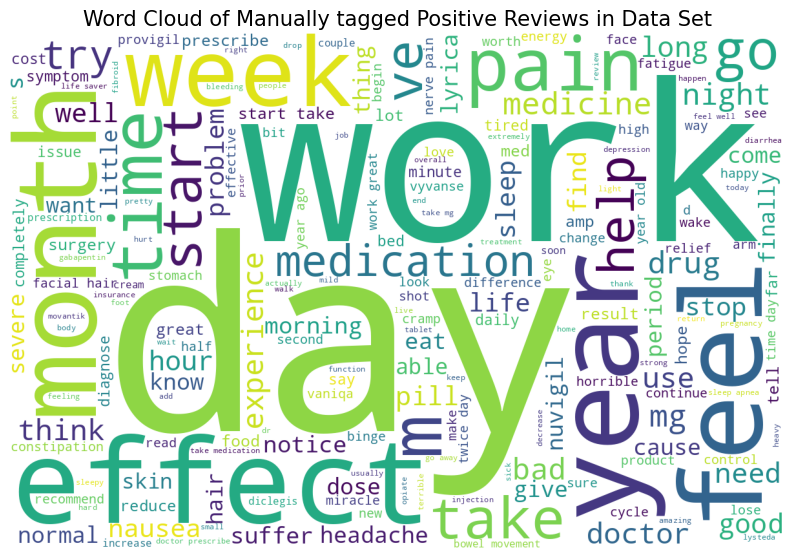

In [41]:
#Wordcloud for the manual postive sentiments
positive = " ".join([text for text in data_sub['review_cleaned'][data_sub['Manual_Sentiment'] == 1]])

wordcloud = WordCloud(background_color = 'white', width = 1200, height = 800).generate(positive)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Word Cloud of Manually tagged Positive Reviews in Data Set', fontsize = 15)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

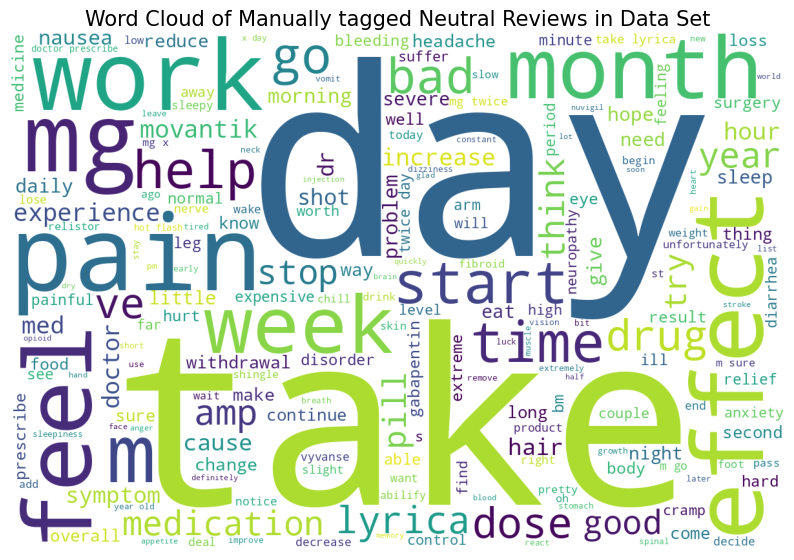

In [42]:
#Wordcloud for the manual neutral sentiments

neutral = " ".join([text for text in data_sub['review_cleaned'][data_sub['Manual_Sentiment'] == 0]])

wordcloud = WordCloud(background_color = 'white', width = 1200, height = 800).generate(neutral)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Word Cloud of Manually tagged Neutral Reviews in Data Set', fontsize = 15)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

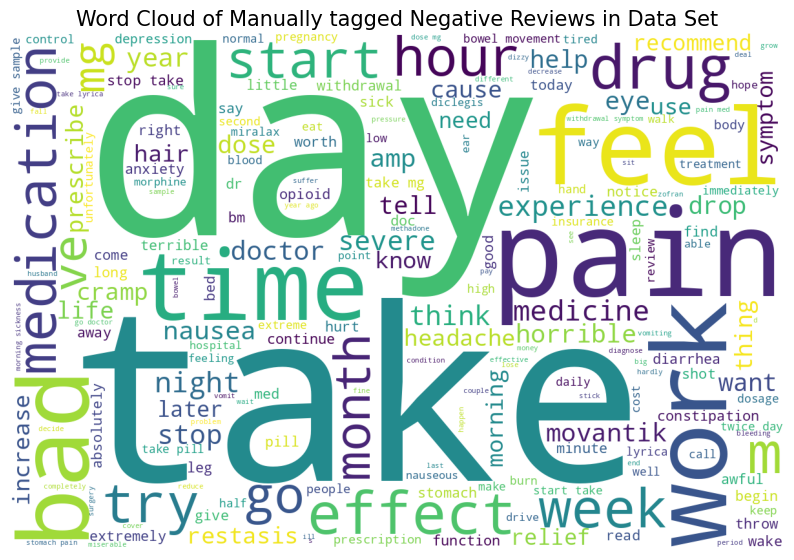

In [43]:
#Wordcloud for the negative manual sentiments in train data set

negative = " ".join([text for text in data_sub['review_cleaned'][data_sub['Manual_Sentiment'] == -1]])

wordcloud = WordCloud(background_color = 'white', width = 1200, height = 800).generate(negative)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Word Cloud of Manually tagged Negative Reviews in Data Set', fontsize = 15)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [44]:
# Check top 30 words used in postive sentiment reviews. In order to do this, converting cleaned reviews to a list 
data_sub_pos_reviews_inlist = data_sub[data_sub['Manual_Sentiment'] == 1]['review_cleaned'].tolist()

In [45]:
# Split each positive review into words
pos_words = []
for review in data_sub_pos_reviews_inlist:
    pos_words.extend(review.split())

# Count the occurrence of each word in positive reviews
data_sub_pos_reviews_word_counts = Counter(pos_words)

# Find the top 30 most frequently used words in positive reviews
positive_reviews_top30_words = pd.DataFrame(data_sub_pos_reviews_word_counts.most_common(30), columns=['Words used', 'Frequency'])
positive_reviews_top30_words

,Words used,Frequency
0,day,854
1,take,654
2,work,574
3,not,517
4,pain,499
5,year,481
6,feel,455
7,effect,424
8,week,412
9,month,401


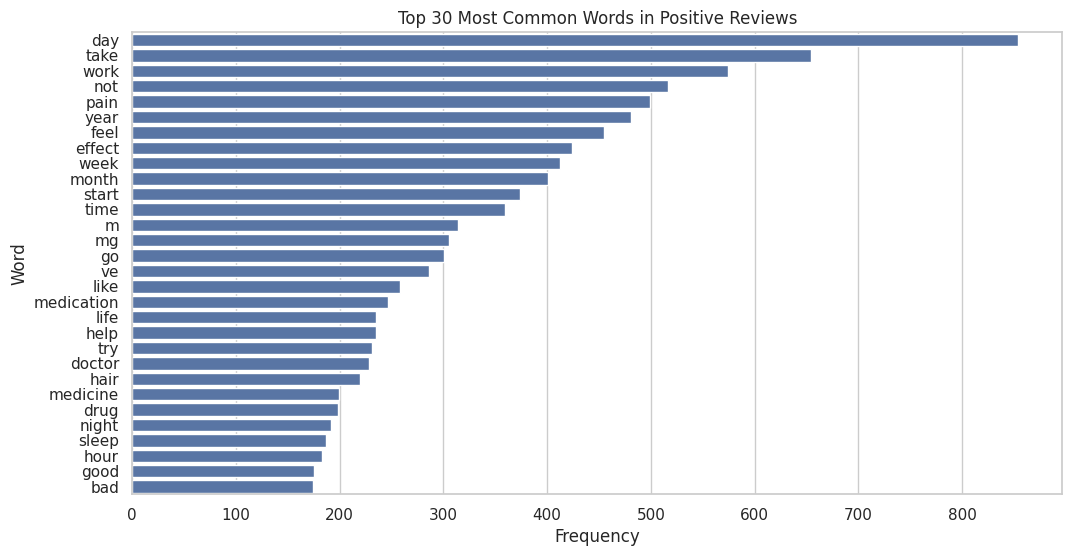

In [46]:
# Plot the frequency of top 30 words used in positive reviews
snsb.set(style="whitegrid")
plt.figure(figsize=(12, 6))
snsb.barplot(data=positive_reviews_top30_words, x="Frequency", y="Words used", color="b")

# Set plot title and axes labels
plt.title("Top 30 Most Common Words in Positive Reviews")
plt.xlabel("Frequency")
plt.ylabel("Word")

# Show the plot
plt.show()

In [47]:
# Repeat the above steps to find top 30 words used in negative reviews
data_sub_neg_reviews_inlist = data_sub[data_sub['Manual_Sentiment'] == -1]['review_cleaned'].tolist()

# Split each negative review into words
data_sub_neg_reviews_words = []
for review in data_sub_neg_reviews_inlist:
    data_sub_neg_reviews_words.extend(review.split())

# Count the occurrence of each word in negative reviews
data_sub_neg_reviews_word_counts = Counter(data_sub_neg_reviews_words)

# Find the top 30 most frequently used words in negative reviews
negative_reviews_top30_words = pd.DataFrame(data_sub_neg_reviews_word_counts.most_common(30), columns=['Words used', 'Frequency'])
negative_reviews_top30_words

,Words used,Frequency
0,take,333
1,not,288
2,day,280
3,pain,239
4,feel,190
5,work,175
6,bad,149
7,time,146
8,drug,141
9,mg,133


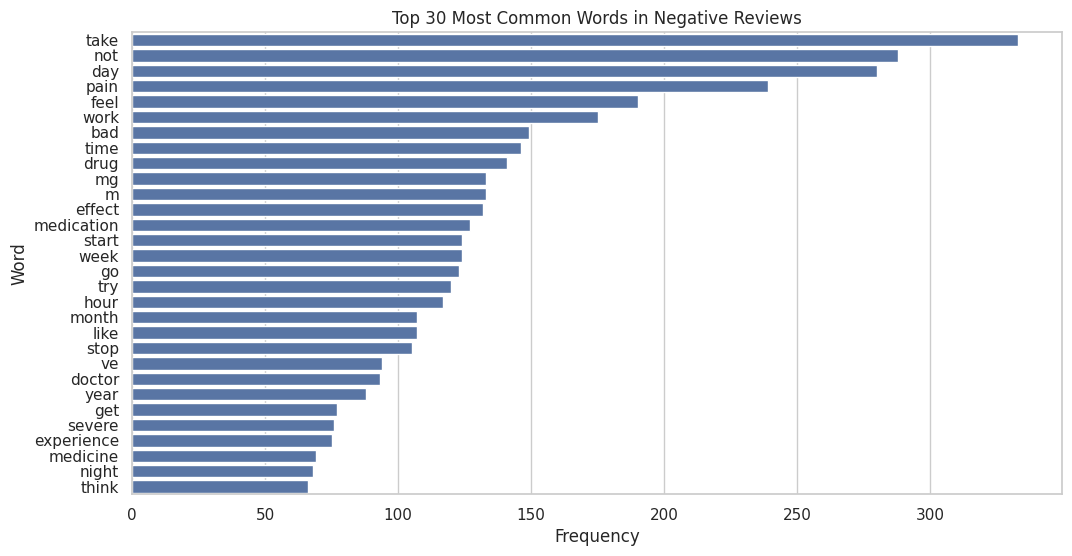

In [48]:
# Plot the frequency of top 30 words used in negative reviews
snsb.set(style="whitegrid")
plt.figure(figsize=(12, 6))
snsb.barplot(data=negative_reviews_top30_words, x="Frequency", y="Words used", color="b")

# Set plot title and axes labels
plt.title("Top 30 Most Common Words in Negative Reviews")
plt.xlabel("Frequency")
plt.ylabel("Word")

# Show the plot
plt.show()

In [49]:
# Repeat the above steps to find top 30 words used in neutral reviews
data_sub_neu_reviews_inlist = data_sub[data_sub['Manual_Sentiment'] == 0]['review_cleaned'].tolist()

# Split each neutral review into words
data_sub_neu_reviews_words = []
for review in data_sub_neu_reviews_inlist:
    data_sub_neu_reviews_words.extend(review.split())

# Count the occurrence of each word in neutral reviews
data_sub_neu_reviews_word_counts = Counter(data_sub_neu_reviews_words)

# Find the top 30 most frequently used words in neutral reviews
neutral_reviews_top30_words = pd.DataFrame(data_sub_neu_reviews_word_counts.most_common(30), columns=['Words used', 'Frequency'])
neutral_reviews_top30_words

,Words used,Frequency
0,day,148
1,take,132
2,not,113
3,pain,104
4,mg,94
5,effect,86
6,work,84
7,feel,79
8,m,73
9,month,72


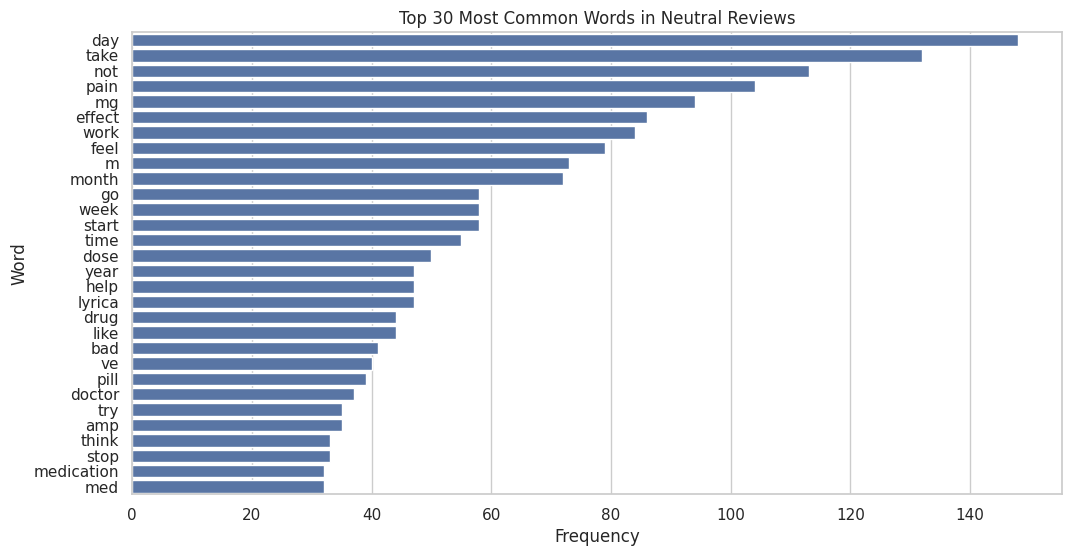

In [50]:
# Plot the frequency of top 30 words used in neutral reviews
snsb.set(style="whitegrid")
plt.figure(figsize=(12, 6))

snsb.barplot(data=neutral_reviews_top30_words, x="Frequency", y="Words used", color="b")

# Set plot title and axes labels
plt.title("Top 30 Most Common Words in Neutral Reviews")
plt.xlabel("Frequency")
plt.ylabel("Word")

# Show the plot
plt.show()

# Part of Speech

There are a few grammatical and structural errors in the given text. Here's the corrected version:

We have two approaches, the Markov model and Hidden Markov Model (HMM), to perform PoS Tagging. In the Markov model, the future state is determined solely by the current state and is not influenced by any previous states. Similarly, in HMM, the future state is determined solely by the current state and is not influenced by any previous states.

We will also explore fine-grained and coarse-grained POS tagging, which refer to the level of detail or granularity in the classification of parts of speech in NLP tasks. Fine-grained POS tagging can be useful in capturing subtle nuances and variations in sentiment expressed through different parts of speech. For example, adjectives and adverbs are often indicative of sentiment and can provide valuable insights into the emotional tone of a sentence.

On the other hand, coarse-grained POS tagging is useful in checking the overall syntactic structure of a sentence without getting into finer details.

Sources:

https://towardsdatascience.com/part-of-speech-tagging-for-beginners-3a0754b2ebba#:~:text=Part%2Dof%2Dspeech%20(POS,the%20word%20and%20its%20context.

https://notebook.community/rishuatgithub/MLPy/nlp/UPDATED_NLP_COURSE/02-Parts-of-Speech-Tagging/00-POS-Basics

In [53]:
from tqdm import tqdm

# Define a function to perform HMM PoS tagging on a list of sentences
def hmm_pos_tagging(sentences):
    pos_tags = []
    for sentence in sentences:
        doc = nlp(sentence)
        pos_tags.extend([(token.text, token.tag_) for token in doc])
    return pos_tags

In [54]:
# Perform fine-grained PoS tagging using HMM
fine_grained_pos_tags = []
for sentence in tqdm(data_sub['review_cleaned']):
    pos_tags = hmm_pos_tagging([sentence])
    fine_grained_pos_tags.extend(pos_tags)

100%|██████████| 1712/1712 [00:22<00:00, 77.14it/s]


In [55]:
# Show the POS
fine_grained_pos_tags

[('m', 'VBP'),
 ('write', 'VB'),
 ('second', 'JJ'),
 ('review', 'NN'),
 ('vaniqa', 'NN'),
 ('start', 'NNP'),
 ('february', 'NNP'),
 ('year', 'NN'),
 ('twice', 'DT'),
 ('day', 'NN'),
 ('daystime', 'NN'),
 ('forget', 'NN'),
 ('want', 'VBP'),
 ('delighted', 'JJ'),
 ('find', 'VBP'),
 ('totally', 'RB'),
 ('completely', 'RB'),
 ('change', 'VB'),
 ('life', 'NN'),
 ('terrible', 'JJ'),
 ('male', 'JJ'),
 ('pattern', 'NN'),
 ('hair', 'NN'),
 ('growth', 'NN'),
 ('cheek', 'NN'),
 ('chin', 'NNP'),
 ('upper', 'NNP'),
 ('low', 'JJ'),
 ('lip', 'NN'),
 ('start', 'VB'),
 ('grow', 'VB'),
 ('neck', 'NN'),
 ('pluck', 'NNP'),
 ('hrs', 'NNP'),
 ('time', 'NN'),
 ('rd', 'NN'),
 ('day', 'NN'),
 ('hair', 'NN'),
 ('free', 'JJ'),
 ('not', 'RB'),
 ('kiss', 'VB'),
 ('hello', 'NNP'),
 ('goodbye', 'NN'),
 ('pluck', 'NNP'),
 ('stubble', 'JJ'),
 ('feel', 'VBP'),
 ('skin', 'NN'),
 ('month', 'NN'),
 ('m', 'VBP'),
 ('scared', 'JJ'),
 ('catch', 'NN'),
 ('bright', 'JJ'),
 ('sunlight', 'NN'),
 ('pluck', 'VBP'),
 ('fortnight', 

In [57]:
from collections import Counter

# Count the frequency of words and POS tags in fine_grained_pos_tags
word_counts = Counter(token[0] for token in fine_grained_pos_tags)
pos_counts = Counter(token[1] for token in fine_grained_pos_tags)

# Print the top 10 most common words and POS tags
print("Top 10 most common words:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")
    
print("\nTop 10 most common POS tags:")
for pos, count in pos_counts.most_common(10):
    print(f"{pos}: {count}")


Top 10 most common words:
day: 1282
take: 1119
not: 918
pain: 842
work: 833
feel: 724
effect: 642
year: 616
week: 594
month: 580

Top 10 most common POS tags:
NN: 28813
JJ: 9560
VBP: 5896
NNP: 5448
VB: 4826
RB: 3947
IN: 777
VBD: 349
VBN: 327
VBG: 320


In [58]:
# Group the POS tags for each word and count their frequencies
word_pos_counts = {}
for word, pos in fine_grained_pos_tags:
    if word not in word_pos_counts:
        word_pos_counts[word] = Counter()
    word_pos_counts[word][pos] += 1

# Print the frequency of each POS tag for the top 10 most common words
for word, count in word_counts.most_common(10):
    print(f"POS frequencies for '{word}':")
    for pos, pos_count in word_pos_counts[word].items():
        print(f"{pos}: {pos_count / count:.2%}")
    print()


POS frequencies for 'day':
NN: 98.52%
NNP: 1.48%

POS frequencies for 'take':
VB: 59.70%
VBP: 30.38%
NNP: 0.89%
NN: 9.03%

POS frequencies for 'not':
RB: 100.00%

POS frequencies for 'pain':
NN: 97.03%
NNP: 1.19%
VBP: 0.83%
VB: 0.95%

POS frequencies for 'work':
NN: 82.23%
VBP: 6.36%
VB: 9.72%
NNP: 1.68%

POS frequencies for 'feel':
VBP: 71.13%
VB: 23.20%
NN: 5.39%
NNP: 0.28%

POS frequencies for 'effect':
NN: 95.64%
VBP: 1.71%
VB: 1.87%
NNP: 0.78%

POS frequencies for 'year':
NN: 98.86%
NNP: 1.14%

POS frequencies for 'week':
NN: 98.82%
NNP: 1.01%
VB: 0.17%

POS frequencies for 'month':
NN: 99.31%
NNP: 0.69%



# Topic Modelling

In [59]:
# Create a list of preprocessed documents
documents = [doc.split() for doc in data_sub['review_cleaned']]

In [60]:
# Create dictionary and corpus

# Create Dictionary
id2word = gensim.corpora.Dictionary(documents)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in documents]

In [61]:
# Create the TF-IDF model and apply it to the corpus
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [62]:
# Number of documents
print(len(corpus_tfidf))

1712


In [63]:
# FInd the optimal number of topics with thge help of coherence score

# Set training parameters.
chunksize = 2000 # In total we have 1712 documents, but we are starting with a chunksize of 2000
passes = 20 # Number of times passes through the corpus 
iterations = 400 # Controls the maximum number of times the model is allowed to update its topic distributions for each document in the corpus

# Create empty lists to store the number of topics and coherence scores
number_of_topics = []
coherence_score = []

# Loop through different number of topics (1 to 9)
for i in range(1,10):
  # Train an LDA model with the current number of topics
  lda_model = models.LdaModel(corpus=corpus_tfidf,
                              id2word = id2word,
                              chunksize=chunksize,
                              alpha='auto',
                              eta='auto',
                              iterations=iterations,
                              num_topics=i,
                              passes=passes)
  # Compute coherence score for the trained LDA model
  coherence_model_lda = CoherenceModel(model=lda_model, 
                                       texts=documents, 
                                       dictionary=id2word, 
                                       coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  # Append the number of topics and coherence score to the respective lists
  number_of_topics.append(i)
  coherence_score.append(coherence_lda)

In [64]:
# Create a dataframe to store the coherence scores for each number of topics
topic_coherence = pd.DataFrame({'number_of_topics':number_of_topics,
                                'coherence_score':coherence_score})

# Show topics
topic_coherence

,number_of_topics,coherence_score
0,1,0.410401
1,2,0.360007
2,3,0.390307
3,4,0.399118
4,5,0.333295
5,6,0.359645
6,7,0.371897
7,8,0.398377
8,9,0.471598


<Axes: xlabel='number_of_topics', ylabel='coherence_score'>

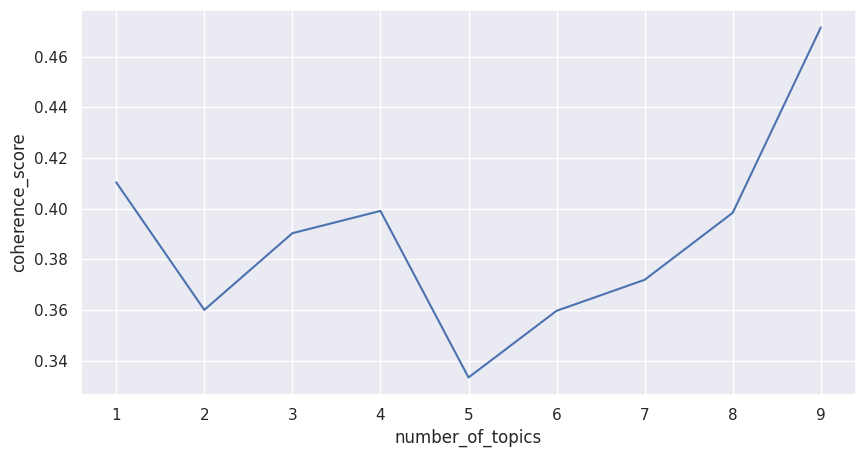

In [65]:
# Plot the coherence scores against the number of topics
snsb.set(rc={'figure.figsize':(10,5)})
snsb.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [ ]:
# Based on the coherence score, the optimal number of topics is 9, as it has the highest coherence score of 0.47

In [66]:
 # Create LDA model

# Set training parameters.
num_topics = 9
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  

lda_model = models.LdaModel(
    corpus=corpus_tfidf,
    id2word = id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [67]:
# CHeck words appearing in each topic with corresponding weights
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.006*"great" + 0.003*"treatment" + 0.003*"lyric" + 0.002*"greatly" + 0.002*"milk" + 0.002*"excedrin" + 0.002*"month" + 0.002*"suffer" + 0.002*"adhesion" + 0.002*"parlodel"
Topic: 1 Word: 0.003*"skin" + 0.003*"thank" + 0.002*"neuropathy" + 0.002*"second" + 0.002*"loss" + 0.002*"lyrica" + 0.002*"severe" + 0.002*"job" + 0.002*"pain" + 0.002*"work"
Topic: 2 Word: 0.002*"cholesterol" + 0.002*"shakey" + 0.002*"yay" + 0.002*"ulcer" + 0.002*"effective" + 0.002*"muscle" + 0.002*"gas" + 0.002*"neurontin" + 0.002*"attack" + 0.002*"plant"
Topic: 3 Word: 0.004*"pain" + 0.004*"drug" + 0.003*"eye" + 0.003*"pressure" + 0.003*"foot" + 0.003*"year" + 0.003*"numbness" + 0.003*"not" + 0.003*"work" + 0.002*"medicine"
Topic: 4 Word: 0.003*"lysteda" + 0.003*"ear" + 0.003*"doctor" + 0.002*"help" + 0.002*"effect" + 0.002*"month" + 0.002*"m" + 0.002*"spinal" + 0.002*"lyrica" + 0.002*"insurance"
Topic: 5 Word: 0.004*"eat" + 0.003*"long" + 0.003*"binge" + 0.003*"feel" + 0.003*"drug" + 0.003*"posit

In [68]:
# Visualize topic models
import pyLDAvis.gensim as gensimvis
import pyLDAvis

vis_data = gensimvis.prepare(lda_model, corpus_tfidf, id2word)
pyLDAvis.display(vis_data)

# Sentiment Analysis

### VADER Lexicon

In [41]:
# Download VADER lexicon from 'nltk'
nltk.download('vader_lexicon')

# Import Sentiment Analyzer from this module and create an instance of this
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Create a copy of df
data_vader = data_sub.copy()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [42]:
# Extract polarity scores for each review, these scores are extracted as key value pairs 
data_vader['VaderP'] = data_vader['review_cleaned'].apply(lambda x: analyzer.polarity_scores(x))

In [43]:
# Get the key with the maximum value for each review and store it in a new column
data_vader['VaderSentiment'] = data_vader['VaderP'].apply(lambda x: max(x, key=x.get))

data_vader.head(3)

,ID,drugName,condition,patientreview,rating,reviewdate,Useful,Manual_Sentiment,review_cleaned,reviewchars,reviewchars_clean,reviewwords,reviewwords_clean,reviewsentence,reviewsentence_clean,VaderP,VaderSentiment
26,206180,Eflornithine,Hirsutism,"""I&#039;m writing a second review on Vaniqa. I started using this in February this year. Twice a day although some days/times I do forget. I just want to say how delighted I am to have found this. It has totally and completely changed my life! I had terrible male pattern hair growth all over my cheeks, chin, upper and lower lip and starting to grow down my neck. I used to pluck for up to 2 hrs a time every 3rd day but was never hair free. I wouldn&#039;t kiss anyone hello or goodbye as even plucked the stubble could be felt under my skin. 3 months on im not scared of being caught in bright sunlight I pluck around once a fortnight and it takes around 10 mins. The hairs that are coming through are soft and downy. My life is transformed.""",10.0,2014-05-11,99,1.0,m write second review vaniqa start february year twice day daystime forget want delighted find totally completely change life terrible male pattern hair growth cheek chin upper low lip start grow neck pluck hrs time rd day hair free not kiss hello goodbye pluck stubble feel skin month m scared catch bright sunlight pluck fortnight take min hair come soft downy life transform,746,377,168,63,11,1,"{'neg': 0.164, 'neu': 0.662, 'pos': 0.174, 'compound': 0.2033}",neu
73,172031,Amitiza,"Constipation, Drug Induced","""I had a tummy tuck on Dec 18. The surgery was painful but the constipation from opioids from the surgery was just as bad. My plastic surgeon wasn&#039;t familiar with treating OIC so I called my primary care physician. She gave me Amitiza 24mcg. It took almost two days but it was amazing and I was so thankful. I had to remain on opioids for three weeks and the Amitiza worked so well I haven&#039;t had any issues!! Thank you Amitiza!!!""",10.0,2016-01-12,35,1.0,tummy tuck dec surgery painful constipation opioid surgery bad plastic surgeon not familiar treat oic call primary care physician give amitiza mcg take day amazing thankful remain opioid week amitiza work not issue thank amitiza,440,228,103,35,7,1,"{'neg': 0.218, 'neu': 0.566, 'pos': 0.216, 'compound': 0.234}",neu
132,133833,Restasis,Keratoconjunctivitis Sicca,"""I was prescribed Restasis by my ophthalmologist due to severe dry eye caused by Accutune. I was given a card that gave me a discount since I did not have private health insurance and used each vile over 2-3 days so that it became effectively very cheap for me to use. I had side effects at first, burning eyes and blurred vision. I was told it takes a minimum of 3 months to see any benefits so I kept using it. It worked almost too well, as my eyes started producing tears so much that my eyes would water all the time. I stopped using the product after 1 year, and my eyes have improved so much I no longer need to use it, although I still use regular over the counter eye drops (Systane Balance) once or twice a day as needed""",9.0,2016-10-05,40,1.0,prescribe restasis ophthalmologist severe dry eye cause accutune give card give discount private health insurance vile day effectively cheap use effect burn eye blur vision tell take minimum month benefit keep work eye start produce tear eye water time stop product year eye improve long need use use regular counter eye drop systane balance twice day need,730,356,156,57,6,1,"{'neg': 0.155, 'neu': 0.692, 'pos': 0.153, 'compound': -0.0516}",neu


In [44]:
# Check sentiment distribution
data_vader.VaderSentiment.value_counts()

neu         1257
compound     346
neg           79
pos           30
Name: VaderSentiment, dtype: int64

##### Manual Check of Vader

In [46]:
# Check number of reviews where Manual sentiment tag is positive but VADER gave a negative score (negative sentiment) for that review
data_vader.query('Manual_Sentiment == 1 & VaderSentiment == "neg"').count().values[0]

35

In [47]:
# Check number reviews where Manual sentiment tag is negative but VADER gave a positive score (positive sentiment) for that review
data_vader.query('Manual_Sentiment == -1 & VaderSentiment == "pos"').count().values[0]

1

In [48]:
# Check shape of VADER
data_vader.shape

(1712, 17)

### NRC Lexicon based Emotion Detection with sentiment

In [82]:
import spacy
from negspacy.negation import Negex
from nrclex import NRCLex

# Function to extract the negations from our POS
def extract_negation_words(pos_tags):
    pseudo_negations = [word[0] for word in pos_tags if word[1] == 'MD']
    preceding_negations = [word[0] for word in pos_tags if word[1] == 'RB']
    following_negations = [word[0] for word in pos_tags if word[1] in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']]
    termination = [word[0] for word in pos_tags if word[1] in ['CC', 'IN']]
    
    # Group words by their POS tag
    words_by_pos = {
        'pseudo_negations': list(set(pseudo_negations)),
        'preceding_negations': list(set(preceding_negations)),
        'following_negations': list(set(following_negations)),
        'termination': list(set(termination))
    }
    
    return words_by_pos

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Long Code

In [84]:
extract_negation_words(fine_grained_pos_tags)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'pseudo_negations': ['shall',
  'need',
  'll',
  'ear',
  'will',
  'can',
  'quotfloodingquot',
  'help',
  'hairhave'],
 'preceding_negations': ['differently',
  'stubbly',
  'monthly',
  'fine',
  'seriously',
  'immediately',
  'instead',
  'significantly',
  'outdoors',
  'especially',
  'occasionally',
  'obviously',
  'possibly',
  'religiously',
  'likely',
  'quickly',
  'tremendously',
  'financially',
  'hopefully',
  'vertigo',
  'effectively',
  'prior',
  'unfortunately',
  'properly',
  'everyday',
  'truthfully',
  'practically',
  'randomly',
  'way',
  'efficiently',
  'highly',
  'live',
  'immeasurably',
  'rarely',
  'ahead',
  'quotjust',
  'addyi',
  'easy',
  'roughly',
  'downhill',
  'generally',
  'positively',
  'tingly',
  'slow',
  'insanely',
  'checkup',
  'course',
  'noticably',
  'watery',
  'morbidly',
  'eventually',
  'consistently',
  'successfully',
  'uncontrollably',
  'simply',
  'daysfortunately',
  'terribly',
  'slightly',
  'yes',
  'cur

In [91]:
# Function to apply the model
def analyze_sentiment(text):
    # Load the spacy model and add the negation component
    nlp = spacy.load("en_core_web_sm")
    nlp.add_pipe("negex", config={"ent_types": ["DIAGNOSIS"], "neg_termset":{
            "pseudo_negations": ['shall',
  'need', 'll','ear','will','can', 'quotfloodingquot', 'help','hairhave'],
 'preceding_negations': ['differently', 'stubbly',  'monthly',  'fine',  'seriously',  'immediately',  'instead',  'significantly',  'outdoors',  'especially',  'occasionally',  'obviously',  'possibly',  'religiously',  'likely',  'quickly',
  'tremendously',  'financially',  'hopefully',  'vertigo',  'effectively',  'prior',  'unfortunately',  'properly',  'everyday',  'truthfully',  'practically',  'randomly',  'way',  'efficiently',  'highly',  'live',  'immeasurably',
  'rarely',  'ahead',  'quotjust',  'addyi',  'easy',  'roughly',  'downhill',  'generally',  'positively',  'tingly',  'slow',  'insanely',  'checkup',  'course',  'noticably',  'watery',  'morbidly',  'eventually',  'consistently',
  'successfully',  'uncontrollably',  'simply',  'daysfortunately',  'terribly',  'slightly',  'yes',  'currently',  'twice',  'hardly',  'timely',  'noticeably',  'solely',  'chemically',  'desperately',  'frequently',  'gemstaxol',
  'blindly',  'magically',  'absolutely',  'vehemently',  'internally',  'increasingly',  'forgetful',  'numb',  'jst',  'personally',  'nothingbelly',  'kind',  'direct',  'shortly',  'potty',  'happily',  'subsequently',  'back',  'necessarily',
  'painfully',  'favorably',  'primarily',  'bad',  'entirely',  'right',  'know',  'round',  'recently',  'prohibitively',  'specifically',  'jittery',  'inh',  'outside',  'completely',  'heavily',  'home',  'nearly',  'physically',
  'moderately',  'persistently',  'anymore',  'later',  'quarterly',  'approximately',  'severely',  'honestly',  'pore',  'nonstop',  'furthermore',  'clear',  'mindblowingly',  'greatly',  'someday',  'lastly',  'repeatedly',  'incredibly',
  'safely',  'constantly',  'mentally',  'ago',  'silently',  'doubt',  'presently',  'substantially',  'regularly',  'unsightly',  'away',  'locally',  'mildly',  'usually',  'anytime',  'ok',  'online',  'second',  'totally',  'daily',
  'awhile',  'directly',  'trivially',  'initially',  'reluctantly',  'fortnight',  'well',  'lately',  'surprisingly',  'accidentally',  'quotbeginner',  'medically',  'exponentially',  'far',  'seldom',  'rationally',  'apart',  'upward',
  'azasite',  'hrs',  'ear',  'headedslightly',  'wide',  'irreversibly',  'outward',  'continually',  'nuvigil',  'sicknessjust',  'firstly',  'certainly',  'inappropriately',  'meniere',  'little',  'finally',  'extra',  'dramatically',
  'normally',  'last',  'badly',  'extremely',  'mdcapfrom',  'commonly',  'probably',  'adequately',  'unbelievably',  'nownot',  'gradually',  'simultaneously',  'maybe',  'perfectly',  'pillow',  'pretty',  'relatively',  'deeply',
  'separately',  'forward',  'straight',  'long',  'briefly',  'assuredly',  'luckily',  'unhealthy',  'horribly',  'anyways',  'close',  'fortunately',  'hard',  'mg',  'particularly',  'visibly',  'naturally',  'unbearably',  'painmaybe',
  'steadily',  'dangerously',  'manually',  'not',  'short',  'whatsoever',  'disappeard',  'lb',  'opioid',  'puffy',  'annually',  'brutally',  'thankfully',  'importantly',  'surely',  'inexplicably',  'accidently',  'nonetheless',  'mighty',
  'exactly',  'pleasantly',  'drastically',  'previously',  'fast',  'slowly',  'plain',  'till',  'enormously',  'wonderfully',  'truly',  'pituitary',  'm',  'mainly',  'swimmingly',  'virtually',  'quietly',  'similarly',  'correctly',
  'somewhat',  'sort',  'typically',  'deathly',  'literally',  'violently',  'prickly',  'altogether',  'curly',  'originally',  'excruciatingly',  'ridiculously',  'considerably',  'hormonally',  'great',  'basically',  'nightly',  'childbirth',
  'overly',  'additionally',  'specially',  'minimally',  'sadly',  'instantly',  'fairly',  'early',  'ultimately',  'accurately',  'oily',  'comfortably',  'smelly',  'permanently',  'affectively',  'obscenely',  'inside',  'super',  'strongly',
  'sparingly',  'fully',  'apparently',  'yr',  'daysreal',  'immensely',  'goingfinally',  'easily',  'overdose',  'even',  'restless',  'ironically',  'eyelid',  'soon',  'vilolently',  'essentially',  'low',  'nuedextajust',  'progressively',
  'suddenly',  'forever',  'eighth',  'actually',  'amazingly',  'barely',  'newand',  'damn',  'definitely',  'half',  'routinely',  'clearly',  'sure',  'respectively',  'marginally',  'emily',  'begrudgingly',  'carefully',  'adenoma',
  'profusely',  'finpeciahad',  'overall',  'heavenly',  'rapidly',  'peripherally',  'sporadically',  'real',  'aka',  'yearly',  'forth',  'dostinex',  'prematurely',  'belly',  'surgically',  'finasteride',  'late'],
    "following_negations": ['manufacturer',  'patch',  'provide',  'lead',  'diclegis',  'quotburnt',  'thank',  'hurt',  'die',  'aidsrelated',  'sound',  'exclude',  'friggin',  'schizophrenia',  'bm',  'depressing',  'softening',
  'return',  'moisturizing',  'recoup',  'chose',  'effect',  'watch',  'note',  'clog',  'spironolatone',  'thing',  'need',  've',  'affect',  'take',  'coumadin',  'percoset',  'assume',  'cut',  'monitoring',  'block',  'claim',
  'osa',  'weigh',  'mgs',  'daymg',  'changedimprove',  'way',  'figure',  'bend',  'live',  'focused',  'discuss',  'lining',  'taking',  'cope',  'alertness',  'prefer',  'like',  'check',  'mix',  'waste',  'fibromyalgia',  'classify',
  'eat',  'expand',  'rifampin',  'impressed',  'purging',  'protect',  'hang',  'advise',  'rem',  'slow',  'undigested',  'dismiss',  'involve',  'approach',  'achieve',  'worry',  'reach',  'result',  'accept',  'explain',  'agree',
  'touch',  'fighting',  'cast',  'vary',  'healing',  'compare',  'cost',  'hand',  'let',  'bowel',  'experience',  'week',  'mean',  'multi',  'renew',  'shave',  'ending',  'retire',  'pound',  'swallow',  'perservere',  'suspect',
  'verge',  'relive',  'pull',  'cramp',  'goosebump',  'eating',  'thanksgiving',  'shortterm',  'hypo',  'combine',  'depress',  'reduce',  'solve',  'burn',  'tell',  'highend',  'blame',  'backing',  'disintereste',  'maximize',
  'find',  'lift',  'helped',  'stroke',  'yelling',  'chemicallyinduce',  'dry',  'relax',  'vicodin',  'collect',  'trucking',  'enter',  'gi',  'say',  'spending',  'benefit',  'exist',  'parasite',  'monitor',  'investigate',
  'cave',  'commit',  'pass',  'convinced',  'meet',  'binge',  'help',  'medicated',  'grant',  'spur',  'inject',  'send',  'hope',  'panic',  'bald',  'abilify',  'owe',  'pick',  'type',  'discover',  'occur',  'arise',  'add',
  'pump',  'sleepiness',  'put',  'fizzle',  'fainting',  'haywire',  'join',  'soak',  'having',  'insist',  'aging',  'prevent',  'scared',  'excruciating',  'mixed',  'intolerable',  'intuniv',  'start',  'reported',  'contend',
  'suppose',  'bleeding',  'stand',  'prove',  'rid',  'appear',  'embarassing',  'admit',  'stinging',  'hug',  'hold',  'lacking',  'kind',  'soonno',  'intolerance',  'deserve',  'decrease',  'shedding',  'interfere',  'boost',
  'approve',  'shingle',  'determine',  'laugh',  'raynaud',  'fade',  'rip',  'reddening',  'sweating',  'warn',  'issue',  'abut',  'tranquilize',  'degree',  'limit',  'qualifying',  'leave',  'inform',  'ignore',  'know',
  'bloating',  'relate',  'evaluate',  'hashimotos',  'tend',  'usend',  'overeaten',  'toss',  'earlypm',  'inwas',  'tiring',  'fact',  'addicted',  'accomplish',  'creon',  'biologic',  'love',  'disoriented',  'peel',
  'spend',  'change',  'follow',  'morenothing',  'rise',  'numbness',  'read', 'typing',  'offer',  'amaze',  'sustain',  'fullness',  'wheezing',  'wanting', 'tolerate',  'expose',  'agitated',  'see',  'cream',  'sweats',  'nerve',
  'induce',  'spread',  'drink',  'tick',  'lived',  'suggest',  'cause',  'hair',  'paralyzed',  'opinion',  'bother',  'evolve',  'dilaudid',  'control',  'subside',  'replace',  'expect',  'thrilled',  'childbearing',  'adapt',
  'clotting',  'rxpcn',  'ban',  'sing',  'desensitize',  'bump',  'superman',  'pushing',  'nsaid',  'mistake',  'grown',  'devastate',  'left',  'surprised',  'manage',  'underlying',  'rub',  'felt',  'publicize',  'place',  'sloughing',
  'homeshcooling',  'blow',  'prepared',  'shape',  'poop',  'disappear',  'visit',  'appreciated',  'freeze',  'propose',  'twitch',  'write',  'suppress',  'diabetes',  'kill',  'going',  'describe',  'suffer',  'imagine',  'pyridoxine',
  'socialize',  'heal',  'kick',  'treat',  'sting',  'immobilize',  'fall',  'have',  'doubt',  'crushed',  'leaking',  'tool',  'nagging',  'offpain',  'debate',  'foot',  'continue',  'luck',  'listen',  'decide',  'damage',
  'away',  'vote',  'understand',  'met',  'conceive',  'care',  'worsen',  'scan',  'milk',  'resolve',  'stitch',  'product',  'thick',  'evac',  'binging',  'function',  'pluck',  'shrink',  'irritated',  'stay',  'plummet',
  'maleka',  'tie',  'insanemade',  'blasting',  'break',  'relistor',  'regularsize',  'drain',  'count',  'nausea',  'fend',  'msg',  'withdrawl',  'update',  'plan',  'comasleep',  'notice',  'destroy',  'drop',  'doin',
  'dizziness',  'bruise',  'review',  'finish',  'lidocaine',  'spine',  'appreciate',  'coming',  'room',  'deliver',  'minimize',  'keep',  'lossing',  'deal',  'breakout',  'progress',  'look',  'prepare',  'spotting',  'arm',
  'embarrassing',  'move',  'level',  'prescribe',  'looking',  'started',  'ear',  'bear',  'remover',  'straining',  'sleeping',  'calorie',  'racing',  'headache',  'guarantee',  'improve',  'enlarged',  'tablet',  'thought',
  'bandaid',  'retake',  'gave',  'regain',  'believe',  'haze',  'reaction',  'speeding',  'catch',  'marked',  'relistore',  'threaten',  'save',  'build',  'decline',  'choke',  'proceed',  'fix',  'barbituate',  'skin',
  'diarrhea',  'sedated',  'crave',  'react',  'research',  'liken',  'darken',  'call',  'married',  'got',  'warrant',  'consume',  's',  'hit',  'hearing',  'eliminate',  'anticipate',  'benign',  'mark',  'highquot',  'organize',
  'disorientate',  'herniated',  'pillow',  'accelerated',  'receive',  'sleep',  'use',  'bleedingbruising',  'inbetween',  'crying',  'face',  'getting',  'yield',  'stimulate',  'quit',  'improved',  'smoke',  'drowsiness',
  'handle',  'dug',  'proscribe',  'vomiting',  'lay',  'hate',  'shot',  'wonderring',  'begin',  'bruising',  'blast',  'close',  'medicine',  'cry',  'feel',  'licenced',  'express',  'seizure',  'heartburn',  'dress',  'acquire',
  'recede',  'develop',  'saving',  'disturbing',  'shout',  'produce',  'frustrated',  'feeling',  'outhad',  'desperation',  'extended',  'go',  'bleed',  'raise',  'undiagnosed',  'force',  'pinch',  'discomfort',  'settle',
  'walk',  'concentrate',  'relief',  'recommend',  'dose',  'blessing',  'rush',  'counselling',  'sunscreen',  'excite',  'confirm',  'warning',  'carry',  'combigan',  'halt',  'vaniqa',  'grow',  'dehydrated',  'aggrevate',  'sit',
  'calming',  'votrient',  'swing',  'comment',  'vanish',  'swelling',  'give',  'remember',  'introduce',  'obtain',  'report',  'fight',  'amazing',  'regulate',  'soften',  'finding',  'frighten',  'reprieve',  'medicate',
  'esteem',  'red',  'bite',  'lengthen',  'fill',  'depressed',  'kid',  'working',  'leak',  'remove',  'require',  'serve',  'regrown',  'otc',  'cramping',  'flow',  'wait',  'm',  'complete',  'compounding',  'survive',
  'work',  'impact',  'drugged',  'wake',  'throw',  'canned',  'chin',  'diagnose',  'push',  'vision',  'answer',  'hear',  'vomit',  'saying',  'sweden',  'buy',  'rest',  'operate',  'include',  'shut',  'injuried',  'flomax',
  'hysterectomy',  'wired',  'relieved',  'insomnianightmare',  'shoot',  'ichad',  'ldl',  'accustomed',  'living',  'relieve',  'sneeze',  'accommodate',  'worried',  'agitation',  'apply',  'encourage',  'create',  'contribute',
  'drive',  'counteract',  'suck',  'disappointed',  'bed',  'starting',  'complain',  'cease',  'come',  'wash',  'copay',  'pop',  'swell',  'consider',  'stabbing',  'burning',  'wonder',  'discontinue',  'prescribed',  'lighten',
  'miss',  'refresh',  'qualify',  'hydromorphone',  'daysmore',  'inflict',  'steal',  'apprehensive',  'stabilizer',  'fear',  'choose',  'bring',  'psa',  'reading',  'post',  'ask',  'respond',  'bit',  'instruct',  'brushing',
  'hallucinate',  'itch',  'blurred',  'shake',  'blink',  'stop',  'play',  'generate',  'esterify',  'breathing',  'lower',  'make',  'detect',  'afford',  'register',  'talk',  'outcome',  'kiss',  'imply',  'communicate',  'dizzines',
  'minute',  'sweat',  'gushing',  'discharge',  'struggle',  'absorb',  'drugit',  'set',  'yawning',  'affected',  'inrs',  'lactase',  'realize',  'tremblinguncoordinated',  'intend',  'remain',  'bless',  'drsaid',  'resort',
  'disease',  'turn',  'med',  'overdose',  'try',  'gain',  'focus',  'mention',  'recover',  'crosseyed',  'withdrawal',  'recur',  'sign',  'learn',  'opt',  'waxing',  'act',  'eyelid',  'drugim',  'godsend',  'intensify',  'wear',
  'fly',  'cover',  'pleased',  'switch',  'pillit',  'maintain',  'excruiate',  'paand',  'seek',  'peeing',  'following',  'trust',  'wellbeing',  'headed',  'continued',  'bulging',  'elevated',  'rely',  'tab',  'weaken',  'get',
  'oppose',  'test',  'run',  'enjoy',  'head',  'reccomend',  'tiredness',  'conform',  'wish',  'increase',  'alleviate',  'fail',  'db',  'ovulate',  'fibroid',  'adjust',  'perform',  'pain',  'show',  'avoid',  'fatigued',
  'yell',  'twitching',  'rd',  'stare',  'undergo',  'tightfeeling',  'appetite',  'shed',  'swear',  'drug',  'annoying',  'lose',  'obsess',  'predict',  'lactaid',  'upperlip',  'knock',  'metadate',  'removed',  'plucking',
  'center',  'address',  'culprit',  'pay',  'speak',  'opiate',  'hesitate',  'allergan',  'forget',  'happen',  'refer',  'hide',  'consult',  'beginning',  'combat',  'stick',  'tingling',  'beat',  'sell',  'burst',  'think',
  'shift',  'tried',  'bloat',  'light',  'reveal',  'apnea',  'gagging',  'itching',  'pursue',  'end',  'refuse',  'diminish',  'squeeze',  'want',  'clean',  'outweigh',  'dr',  'flare',  'craving',  'reintroduce',  'depend',
  'lifestylekeeping',  'discourage',  'overpriced',  'vyvanse',  'rack',  'wantedv',  'upped',  'demand',  'predinsome',  'allow',  'agitate',  'guess',  'libido',  'indicate',  'descend'],
  'termination': ['alongside',  'n',  'unlike',  'wt',  'enzyme',  'yr',  'aml', 'ie', 'druglike',  'v',  'ta',  'like',  'to',  'jag',  'th',  'comesfor',  'apart',  'np',  'oz',  'bm',  'whilst', 'mg',  'underneath',  'ct',
  'ob',  'tb',  'hg',  'ok',  'sp',  'rn',  'wow',  'onwards',  'minus',  'outside',  'll',  'near',  'ear',  'till',  'rx',  'til',  'tbi',  'plus',  'despite',  'versus',  'vertigo',  'overeater',  'wk',  'lose',  'past',  'premenopause',
  'cause',  'pristiq',  'while',  'albeit',  'whatsoever',  'ago',  'lb',  'inside',  'vs',  'oversleep',  'anymore',  'super',  'bedbut',  'pe',  'oddball',  'd']}})    
    
    # Process text with spaCy
    doc = nlp(text)
    
    # Calculate sentiment using NRC lexicon
    emotions = NRCLex(text).affect_frequencies
    return emotions

# Creating a copy of the df
data_NRC = data_sub.copy()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Applying sentiment analysis

In [92]:
# Apply sentiment analysis to each pre-processed review
data_NRC['emotions'] = data_NRC['review_cleaned'].apply(analyze_sentiment)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
# Get the key with the maximum value for each review and store it in a new column 'RobertaSentiment'
data_NRC['NRCsent'] = data_NRC['emotions'].apply(lambda x: max(x, key=x.get))

# Display the first three rows of the resulting dataframe
data_NRC.head(3)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,drugName,condition,patientreview,rating,reviewdate,Useful,Manual_Sentiment,review_cleaned,reviewchars,reviewchars_clean,reviewwords,reviewwords_clean,reviewsentence,reviewsentence_clean,emotions,NRCsent
26,206180,Eflornithine,Hirsutism,"""I&#039;m writing a second review on Vaniqa. I started using this in February this year. Twice a day although some days/times I do forget. I just want to say how delighted I am to have found this. It has totally and completely changed my life! I had terrible male pattern hair growth all over my cheeks, chin, upper and lower lip and starting to grow down my neck. I used to pluck for up to 2 hrs a time every 3rd day but was never hair free. I wouldn&#039;t kiss anyone hello or goodbye as even plucked the stubble could be felt under my skin. 3 months on im not scared of being caught in bright sunlight I pluck around once a fortnight and it takes around 10 mins. The hairs that are coming through are soft and downy. My life is transformed.""",10.0,2014-05-11,99,1.0,m write second review vaniqa start february year twice day daystime forget want delighted find totally completely change life terrible male pattern hair growth cheek chin upper low lip start grow neck pluck hrs time rd day hair free not kiss hello goodbye pluck stubble feel skin month m scared catch bright sunlight pluck fortnight take min hair come soft downy life transform,746,377,168,63,11,1,"{'fear': 0.07692307692307693, 'anger': 0.038461538461538464, 'anticip': 0.0, 'trust': 0.038461538461538464, 'surprise': 0.11538461538461539, 'positive': 0.23076923076923078, 'negative': 0.07692307692307693, 'sadness': 0.038461538461538464, 'disgust': 0.038461538461538464, 'joy': 0.11538461538461539, 'anticipation': 0.23076923076923078}",positive
73,172031,Amitiza,"Constipation, Drug Induced","""I had a tummy tuck on Dec 18. The surgery was painful but the constipation from opioids from the surgery was just as bad. My plastic surgeon wasn&#039;t familiar with treating OIC so I called my primary care physician. She gave me Amitiza 24mcg. It took almost two days but it was amazing and I was so thankful. I had to remain on opioids for three weeks and the Amitiza worked so well I haven&#039;t had any issues!! Thank you Amitiza!!!""",10.0,2016-01-12,35,1.0,tummy tuck dec surgery painful constipation opioid surgery bad plastic surgeon not familiar treat oic call primary care physician give amitiza mcg take day amazing thankful remain opioid week amitiza work not issue thank amitiza,440,228,103,35,7,1,"{'fear': 0.15151515151515152, 'anger': 0.09090909090909091, 'anticip': 0.0, 'trust': 0.09090909090909091, 'surprise': 0.030303030303030304, 'positive': 0.15151515151515152, 'negative': 0.12121212121212122, 'sadness': 0.15151515151515152, 'disgust': 0.12121212121212122, 'joy': 0.06060606060606061, 'anticipation': 0.030303030303030304}",fear
132,133833,Restasis,Keratoconjunctivitis Sicca,"""I was prescribed Restasis by my ophthalmologist due to severe dry eye caused by Accutune. I was given a card that gave me a discount since I did not have private health insurance and used each vile over 2-3 days so that it became effectively very cheap for me to use. I had side effects at first, burning eyes and blurred vision. I was told it takes a minimum of 3 months to see any benefits so I kept using it. It worked almost too well, as my eyes started producing tears so much that my eyes would water all the time. I stopped using the product after 1 year, and my eyes have improved so much I no longer need to use it, although I still use regular over the counter eye drops (Systane Balance) once or twice a day as needed""",9.0,2016-10-05,40,1.0,prescribe restasis ophthalmologist severe dry eye cause accutune give card give discount private health insurance vile day effectively cheap use effect burn eye blur vision tell take minimum month benefit keep work eye start produce tear eye water time stop product year eye improve long need use use regular counter eye drop syst

In [94]:
# Emotion and sentiment distribution
data_NRC['NRCsent'].value_counts()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


negative        711
positive        502
fear            231
trust           125
anticipation    107
anger            16
disgust           8
surprise          7
sadness           5
Name: NRCsent, dtype: int64

#### Manual check of NRC

In [ ]:
# Check number of reviews where Manual sentiment tag is positive but NRC gave a negative score (negative sentiment) for that review
data_NRC.query('Manual_Sentiment == 1 & NRCsent == "negative"').count()

In [ ]:
# Check reviews where Manual sentiment tag is negative but NRC gave a positive score (positive sentiment) for that review
data_NRC.query('Manual_Sentiment == -1  & NRCsent == "positive"').count()

In [ ]:
# Shape of data_NRC
data_NRC.shape

### RoBERTa Transformer Model

In [96]:
# Define the model to use
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# Load the pre-trained model
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
#Define a function that takes an input text example and returns a dictionary of Roberta polarity scores
def roberta_polarity(example):
    # Encode the text using the tokenizer
    encoded_text = tokenizer(example, return_tensors='pt')
    # Pass the encoded text through the pre-trained model
    output = model(**encoded_text)
    # Get the scores from the output tensor and convert them to a numpy array
    scores = output[0][0].detach().numpy()
    # Apply softmax to the scores to get probabilities
    scores = softmax(scores)
    # Create a dictionary with the scores for each sentiment label
    scores_dict = {
        'Neg' : scores[0],
        'Nue' : scores[1],
        'Pos' : scores[2]
    }
    return scores_dict

# Create a copy of the train dataframe
data_rob = data_sub.copy()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
# Apply the roberta_polarity function to each review in the 'review_cleaned' column and store the results in a new column 'RobP'
data_rob['RobP'] = data_rob['review_cleaned'].apply(roberta_polarity)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [99]:
# Get the key with the maximum value for each review and store it in a new column 'RobertaSentiment'
data_rob['RobertaSentiment'] = data_rob['RobP'].apply(lambda x: max(x, key=x.get))

# Display the first three rows of the resulting dataframe
data_rob.head(3)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,drugName,condition,patientreview,rating,reviewdate,Useful,Manual_Sentiment,review_cleaned,reviewchars,reviewchars_clean,reviewwords,reviewwords_clean,reviewsentence,reviewsentence_clean,RobP,RobertaSentiment
26,206180,Eflornithine,Hirsutism,"""I&#039;m writing a second review on Vaniqa. I started using this in February this year. Twice a day although some days/times I do forget. I just want to say how delighted I am to have found this. It has totally and completely changed my life! I had terrible male pattern hair growth all over my cheeks, chin, upper and lower lip and starting to grow down my neck. I used to pluck for up to 2 hrs a time every 3rd day but was never hair free. I wouldn&#039;t kiss anyone hello or goodbye as even plucked the stubble could be felt under my skin. 3 months on im not scared of being caught in bright sunlight I pluck around once a fortnight and it takes around 10 mins. The hairs that are coming through are soft and downy. My life is transformed.""",10.0,2014-05-11,99,1.0,m write second review vaniqa start february year twice day daystime forget want delighted find totally completely change life terrible male pattern hair growth cheek chin upper low lip start grow neck pluck hrs time rd day hair free not kiss hello goodbye pluck stubble feel skin month m scared catch bright sunlight pluck fortnight take min hair come soft downy life transform,746,377,168,63,11,1,"{'Neg': 0.4846785, 'Nue': 0.451215, 'Pos': 0.06410654}",Neg
73,172031,Amitiza,"Constipation, Drug Induced","""I had a tummy tuck on Dec 18. The surgery was painful but the constipation from opioids from the surgery was just as bad. My plastic surgeon wasn&#039;t familiar with treating OIC so I called my primary care physician. She gave me Amitiza 24mcg. It took almost two days but it was amazing and I was so thankful. I had to remain on opioids for three weeks and the Amitiza worked so well I haven&#039;t had any issues!! Thank you Amitiza!!!""",10.0,2016-01-12,35,1.0,tummy tuck dec surgery painful constipation opioid surgery bad plastic surgeon not familiar treat oic call primary care physician give amitiza mcg take day amazing thankful remain opioid week amitiza work not issue thank amitiza,440,228,103,35,7,1,"{'Neg': 0.09689573, 'Nue': 0.37401977, 'Pos': 0.5290845}",Pos
132,133833,Restasis,Keratoconjunctivitis Sicca,"""I was prescribed Restasis by my ophthalmologist due to severe dry eye caused by Accutune. I was given a card that gave me a discount since I did not have private health insurance and used each vile over 2-3 days so that it became effectively very cheap for me to use. I had side effects at first, burning eyes and blurred vision. I was told it takes a minimum of 3 months to see any benefits so I kept using it. It worked almost too well, as my eyes started producing tears so much that my eyes would water all the time. I stopped using the product after 1 year, and my eyes have improved so much I no longer need to use it, although I still use regular over the counter eye drops (Systane Balance) once or twice a day as needed""",9.0,2016-10-05,40,1.0,prescribe restasis ophthalmologist severe dry eye cause accutune give card give discount private health insurance vile day effectively cheap use effect burn eye blur vision tell take minimum month benefit keep work eye start produce tear eye water time stop product year eye improve long need use use regular counter eye drop systane balance twice day need,730,356,156,57,6,1,"{'Neg': 0.12409243, 'Nue': 0.7129941, 'Pos': 0.1629135}",Nue


In [100]:
# Check sentiment distribution
data_rob.RobertaSentiment.value_counts()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nue    837
Neg    607
Pos    268
Name: RobertaSentiment, dtype: int64

In [101]:
data_rob.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1712 entries, 26 to 161244
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    1712 non-null   int64         
 1   drugName              1712 non-null   object        
 2   condition             1712 non-null   object        
 3   patientreview         1712 non-null   object        
 4   rating                1712 non-null   float64       
 5   reviewdate            1712 non-null   datetime64[ns]
 6   Useful                1712 non-null   int64         
 7   Manual_Sentiment      1712 non-null   float64       
 8   review_cleaned        1712 non-null   object        
 9   reviewchars           1712 non-null   int64         
 10  reviewchars_clean     1712 non-null   int64         
 11  reviewwords           1712 non-null   int64         
 12  reviewwords_clean     1712 non-null   int64         
 13  reviewsentence 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Manual check of Roberta

In [102]:
# Check number reviews where the manual sentiment tag is positive but Roberta gave a negative score (negative sentiment) for that review
data_rob.query('Manual_Sentiment == 1 & RobertaSentiment == "Neg"').count().values[0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


246

In [103]:
# Check number of reviews where manual sentiment tag is negative but Roberta gave a positive score (positive sentiment) for that review
data_rob.query('Manual_Sentiment == -1  & RobertaSentiment == "Pos"').count().values[0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


14

In [104]:
# Check shape
data_rob.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1712, 17)

In [105]:
data_rob.Useful.describe()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    1712.000000
mean       27.976051
std        27.901618
min         0.000000
25%         9.000000
50%        20.000000
75%        39.000000
max       241.000000
Name: Useful, dtype: float64

# Homburg et al. (2015)

### SVM

In [121]:
# Import required libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Preprocess text data
sentences = [review.split() for review in data_rob['review_cleaned']]
# Train word2vec model
model = gensim.models.Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)
# Prepare word2vec features for SVM
X = []
for sentence in sentences:
    feature_vec = np.zeros((100,), dtype="float32")
    n_words = 0
    for word in sentence:
        if word in model.wv.key_to_index:
            feature_vec = np.add(feature_vec, model.wv[word])
            n_words += 1
    if n_words > 0:
        feature_vec = np.divide(feature_vec, n_words)
    X.append(feature_vec)
y = data_rob['RobertaSentiment']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train SVM model
svm = SVC(kernel='linear', C=1, gamma='auto')
svm.fit(X_train, y_train)

# Evaluate SVM model
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

         Neg       0.00      0.00      0.00       133
         Nue       0.47      1.00      0.64       161
         Pos       0.00      0.00      0.00        49

    accuracy                           0.47       343
   macro avg       0.16      0.33      0.21       343
weighted avg       0.22      0.47      0.30       343



### Random Forest

In [118]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the preprocessed data

# Train a Word2Vec model
sentences = [review.split() for review in data_rob['review_cleaned']]
w2v_model = gensim.models.Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=5, workers=4)

# Define a function to generate document embeddings
def generate_doc_embedding(doc, model):
    doc_embedding = np.zeros(model.vector_size)
    n_words = 0
    for word in doc:
        if word in model.wv.key_to_index:
            doc_embedding += model.wv[word]
            n_words += 1
    if n_words > 0:
        doc_embedding /= n_words
    return doc_embedding

# Generate document embeddings for the reviews
embeddings = []
for review in sentences:
    embedding = generate_doc_embedding(review, w2v_model)
    embeddings.append(embedding)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, data_rob['RobertaSentiment'], test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.717201166180758


In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Neg       0.73      0.63      0.68       133
         Nue       0.68      0.85      0.76       161
         Pos       0.93      0.51      0.66        49

    accuracy                           0.72       343
   macro avg       0.78      0.66      0.70       343
weighted avg       0.74      0.72      0.71       343



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
